#### 1.0
**Exercise 1. Problem Statement:** The *ideal gas law* is given by<br>

$$pV=nRT \tag{1.1}$$<br>
where $p$ is the absolute pressure, $V$ is the volume, $n$ is the number of moles, $R$ is the universal gas constant, and $T$ is the absolute temperature. Although this equation is widely used by engineers and scientists, it is accurate over only a limited range of pressure and temperature. Furthermore, Eq.(1.1) is more appropriate for some gases than for others. An alternative equation of state for gases is given by
<br>

$$\left( p+\frac{a}{\upsilon^2}\right)(\upsilon-b)=RT\tag{1.2}
$$<br>
known as the _van der Waals equation,_ where
$$\upsilon=\frac{V}{n}
$$
is the molal volume and $a$ and $b$ are empirical constants that depend on the particular gas.<br>
**(a)** A chemical engineering design project requires that you accurately estimate the molal volume ($\upsilon$) of both carbon dioxide ($CO_2$) and oxygen ($O_2$) for a number of different temperature and pressure combinations so that appropriate containment vessels can be selected.<br>
**(b)** It is also of interest to examine how well each gas conforms to the ideal gas law by comparing the molal volume as calculated by Eqs.(1.1) and (1.2). The following data are provided:

$$R=0.082054 \mbox{ L atm/(mol K)}
$$

$$
\begin{matrix}
\mbox{carbon dioxide (}CO_2 \mbox{)}\left\{
\begin{matrix}
a=3.592\\
b=0.04267
\end{matrix}\right.
&&\mbox{oxygen (}O_2\mbox{)}\left\{
\begin{matrix}
a=1.360\\
b=0.03183
\end{matrix}\right.
\end{matrix}
$$

To accomplist goals listed in **(a)** and **(b)**, you have to fill out missing values $\upsilon$ of molal volumes in **Table 1** below. Set absolute tolerance equal to **0.01** in all your calculation. Don't forget to list corresponding root searching intervals or initial root estimates in the last column of **Table 1**.

#### 1.1
**Table 1. Molal volumes computed using Ideal Gas and van der Waals Laws.**<br>

$T$,K | $p$, atm | $\upsilon$(Ideal Gas Law), L/mol| $\upsilon_{CO_2}$(van der Waals), L/mol  | $\upsilon_{O_2}$(van der Waals), L/mol  |Root Finding Method (initial data)|
------|-----:|--------------:|----------:|-------:|-----------------------------------:|
300   |1     |24.6162        |24.515     |     24.589|Bisection ($[23.249,25.984]$)      |
      |10    |2.46162        |2.351      |     2.436|Bisection ($[2.3249,2.5984]$)      |
      |100   |0.246162       |0.088      |     0.226|Bisection ($[0.079,0.096],[0.205,0.232]$)      |
500   |1     |41.027         |40.982     |    41.026|False Position ($[38.75,43.31]$) |
      |10    |4.1027         |4.058      |    4.102 |False Position ($[3.875,4.331]$) |
      |100   |0.41027        |0.366      |     0.412|False Position ($[0.34,0.39],[0.39,0.43]$) |
700   |1     |57.4378        |57.419     |  57.446  |Secant (45.95, 80.41)          |
      |10    |5.74378        |5.724      | 5.752    |Secant (4.595, 8.041)          |
      |100   |0.574378       |0.557      | 0.584    |Secant (0.4595, 0.8041)          |
  
where $T$ - temperature, $p$ - pressure, $\upsilon$ - molal volume.

In [1]:
#1.2
import numpy as np
import matplotlib.pyplot as plt

#define constants
r=0.082054
c_a,c_b=3.592,0.04267
o_a,o_b=1.360,0.03183

def fv(a,b,vm,t,p,r):
    return ((p+a/vm**2)*(vm-b)-r*t)

#define a function to find the locations of roots
#since ideal gas law approximates the behaviour of gases,
#we can assume that the roots should be near the ideal prediction
#if the root cannot be found, increase the searching interval
def root_loc(a,b,t,p,r,f):
    vm_t=r*t/p
    n=10
    intv=[vm_t*.5,vm_t*1.5]
    while(True):
        subins=np.linspace(intv[0],intv[1],n)
        for i in range(0,n-1):
            if f(a,b,subins[i],t,p,r)*f(a,b,subins[i+1],t,p,r)<0:
                return [subins[i],subins[i+1]]
        n*=4
        intv[0]*=.5
        intv[1]*=2

def bisects(x1,x2,tol,f,a,b,t,p,r):
    xr=0
    while(abs(x1-x2)>tol):
        xr=(x1+x2)/2
        if f(a,b,xr,t,p,r)==0.0:
            print("Found exact root at {}".format(xr))
            return
        if f(a,b,x1,t,p,r)*f(a,b,xr,t,p,r)<0:
            x2=xr
        else:
            x1=xr
        
    
    print("The root is at {:.8f} with the tolerance {}".format(xr,tol))
    

In [2]:
#1.2
p=[1,10,100]
print("For carbon dioxide:")
for j in p:
    print(f"The temperature is {300} and pressure is {j}")
    ins=root_loc(c_a,c_b,300,j,r,fv)
    print(ins)
    bisects(ins[0],ins[1],10**-2,fv,c_a,c_b,300,j,r)
    print("\n")
print("For oxygen:")
for j in p:
    print(f"The temperature is {300} and pressure is {j}")
    ins=root_loc(o_a,o_b,300,j,r,fv)
    print(ins)
    bisects(ins[0],ins[1],10**-2,fv,o_a,o_b,300,j,r)
    print("\n")

For carbon dioxide:
The temperature is 300 and pressure is 1
[23.248633333333334, 25.983766666666668]
The root is at 24.51470091 with the tolerance 0.01


The temperature is 300 and pressure is 10
[2.324863333333333, 2.598376666666667]
The root is at 2.35050521 with the tolerance 0.01


The temperature is 300 and pressure is 100
[0.07889807692307692, 0.09625565384615384]
The root is at 0.08757687 with the tolerance 0.01


For oxygen:
The temperature is 300 and pressure is 1
[23.248633333333334, 25.983766666666668]
The root is at 24.58948971 with the tolerance 0.01


The temperature is 300 and pressure is 10
[2.324863333333333, 2.598376666666667]
The root is at 2.43597813 with the tolerance 0.01


The temperature is 300 and pressure is 100
[0.20513499999999998, 0.23248633333333332]
The root is at 0.22564850 with the tolerance 0.01




In [3]:
#1.3
def false(x1,x2,tol,f,a,b,t,p,r):
    xr=x2
    xrold=x2+tol*4
    while(tol<abs(xr-xrold)):
        xrold=xr
        xr=x2-(f(a,b,x2,t,p,r)*(x2-x1))/(f(a,b,x2,t,p,r)-f(a,b,x1,t,p,r))
        if f(a,b,xr,t,p,r)==0.0:
            print("Found exact solution at {}".format(xr))
        if f(a,b,x1,t,p,r)*f(a,b,xr,t,p,r)<0:
            x2=xr
        else:
            x1=xr
    print("The root is at {:.3f} within the tolerance {}".format(xr,tol))

In [4]:
#1.3
p=[1,10,100]
print("For carbon dioxide:")
for j in p:
    print(f"The temperature is {500} and pressure is {j}")
    ins=root_loc(c_a,c_b,500,j,r,fv)
    print(ins)
    false(ins[0],ins[1],10**-2,fv,c_a,c_b,500,j,r)
    print("\n")
print("For oxygen:")
for j in p:
    print(f"The temperature is {500} and pressure is {j}")
    ins=root_loc(o_a,o_b,500,j,r,fv)
    print(ins)
    false(ins[0],ins[1],10**-2,fv,o_a,o_b,500,j,r)
    print("\n")

For carbon dioxide:
The temperature is 500 and pressure is 1
[38.74772222222222, 43.30627777777778]
The root is at 40.982 within the tolerance 0.01


The temperature is 500 and pressure is 10
[3.874772222222223, 4.330627777777778]
The root is at 4.058 within the tolerance 0.01


The temperature is 500 and pressure is 100
[0.3418916666666667, 0.38747722222222225]
The root is at 0.366 within the tolerance 0.01


For oxygen:
The temperature is 500 and pressure is 1
[38.74772222222222, 43.30627777777778]
The root is at 41.026 within the tolerance 0.01


The temperature is 500 and pressure is 10
[3.874772222222223, 4.330627777777778]
The root is at 4.102 within the tolerance 0.01


The temperature is 500 and pressure is 100
[0.38747722222222225, 0.4330627777777778]
The root is at 0.412 within the tolerance 0.01




In [5]:
#1.4
def secant(tol,f,a,b,t,p,r):
    x=[0.8*r*t/p,1.4*r*t/p]
    print(x[0],' ',x[1])
    while(tol<abs(x[-1]-x[-2])):
        x.append(x[-1]-(f(a,b,x[-1],t,p,r)*(x[-2]-x[-1])/(f(a,b,x[-2],t,p,r)-f(a,b,x[-1],t,p,r))))

    print("The root is at {:.3f} within the tolerance {}".format(x[-1],tol))

In [6]:
#1.4
print("For carbon dioxide:")
p=[1,10,100]
for j in p:
    print(f"The temperature is {700} and pressure is {j}")
    secant(10**-2,fv,c_a,c_b,700,j,r)
    print("\n")
print("For oxygen:")
for j in p:
    print(f"The temperature is {700} and pressure is {j}")
    secant(10**-2,fv,o_a,o_b,700,j,r)
    print("\n")

For carbon dioxide:
The temperature is 700 and pressure is 1
45.95024   80.41292
The root is at 57.418 within the tolerance 0.01


The temperature is 700 and pressure is 10
4.595024   8.041292
The root is at 5.724 within the tolerance 0.01


The temperature is 700 and pressure is 100
0.45950240000000003   0.8041292
The root is at 0.557 within the tolerance 0.01


For oxygen:
The temperature is 700 and pressure is 1
45.95024   80.41292
The root is at 57.446 within the tolerance 0.01


The temperature is 700 and pressure is 10
4.595024   8.041292
The root is at 5.752 within the tolerance 0.01


The temperature is 700 and pressure is 100
0.45950240000000003   0.8041292
The root is at 0.584 within the tolerance 0.01




#### 2.0

**Exercise 2. Problem Statement:** The equation of Kepler is
$$E=M+e\sin{E}\tag{2.1}$$<br>
where $E$ - eccentric anomaly of the planet, $M$ - mean anomaly and $e$ is the eccentricity.<br>

Employ the Newton-Raphson numerical algorithm to calculate the true anomaly $E$ for the planet Mars when the mean anomaly is $M = 98.679^o$. The eccentricity of the orbit of Mars around the Sun is $e=0.09340$. For the purposes of calculations, angles in degrees should be converted to radians.
<br>

**1)** Provide $E$ in degrees for $n=1$, $n=3$ and $n=5$ number of interations using Newton-Raphson's method.<br>
**2)** Provide $E$ in degrees for 1,3, and 5 number of iterations using the fixed-point iteration method with the same initial guess $E_{ig}$ as in **1)**.<br>
**3)** Plot function $E(M)$ for $M$ in the range $[-\pi,\pi]$ with a step size $\Delta M=0.1$ and choose three values of the eccentricity $e=$ $0.00$, $0.09$, $0.90$. $E$ and $M$ should be in radians. Use your Newton-Raphson's method implementation to evaluate $E(M)$ at fixed number of iterations $n=5$.

In [7]:
#2.1
m=98.679/(180)*np.pi
e=0.09340
#The original function is already given in the form of x=g(x)
#therefore, we can just use that function for fixed point iteration
def kep_fix(E,m,e):
    return m+e*np.sin(E)
def kep_newt(E,m,e):
    return E-(m+e*np.sin(E))
def kep_der(E,e):
    return (1-e*np.cos(E))

def newt(f,f_der,n,m,e):
    x=[m]
    for i in range(0,n):
        x.append(x[-1]-f(x[-1],m,e)/f_der(x[-1],e))
    return x[-1]


In [8]:
#2.1
print(f"The initial guess is {m}")
for i in [1,3,5]:
    print("The {}th iteration yields {:.10f}".format(i,newt(kep_newt,kep_der,i,m,e)))

The initial guess is 1.7222734525754844
The 1th iteration yields 1.8133207402
The 3th iteration yields 1.8129484296
The 5th iteration yields 1.8129484296


In [9]:
#2.2
def fix(f,n,m,e):
    E=m
    for i in range(0,n):
        E=f(E,m,e)
    return E

In [10]:
#2.2
for i in [1,3,5]:
    print("The {}th iteration yields {:.10f}".format(i,fix(kep_fix,i,m,e)))

The 1th iteration yields 1.8146039535
The 3th iteration yields 1.8129492628
The 5th iteration yields 1.8129484300


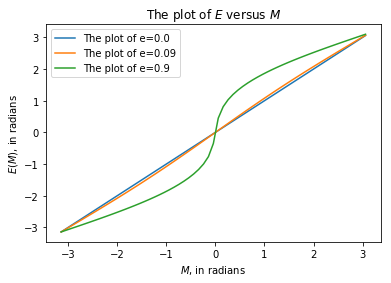

In [11]:
#2.3
e_p=[0.00,0.09,0.90]
E=[]
ms=np.arange(-np.pi,np.pi,0.1)
for ei in e_p:
    for mi in ms:
        E.append(newt(kep_newt,kep_der,5,mi,ei))
        
    plt.plot(ms,E,label=f'The plot of e={ei}')
    E=[]
plt.xlabel(r"$M$, in radians")
plt.ylabel(r"$E(M)$, in radians")
plt.title(r"The plot of $E$ versus $M$")
plt.legend()
plt.show()